# Getting Started

The package `stochastic_matching` allows you to:

- Build a stochastic model (from scratch, from one of the provided models, or by some combination).
- Attach arrival rates on nodes to it.
- Study the theoretical stability of the system.
- Explore the feasible matching rates.
- Use a simulator to study the behavior of the system under pre-defined or custom-made policies.

## Graph building

Two types of graphs can be used:

- Simple graphs, where edges are pairs of distinct nodes.
- Hypergraphs, where edges are arbitrary non-empty subsets of nodes, possibly with multiplicity.

Simple graphs can be created from an adjacency matrix.

In [1]:
import numpy as np
import stochastic_matching as sm

adja = np.array([[0, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 0]])

diamond = sm.Model(adjacency=adja)

The graph can be displayed.

In [2]:
diamond.show_graph()

Hypergraphs can be build from their incidence matrix. For example, the following hypergraph is made of a line of three nodes with mono-edges at both ends. 

In [3]:
incidence = np.array([[1, 1, 0, 0],
                      [0, 1, 1, 0],
                      [0, 0, 1, 1]])
graph = sm.Model(incidence=incidence, names='alpha')

On display, edges are represented by small black nodes, and the edges displayed alway link one node to one edge.

In [4]:
graph.show_graph()

The package provides several graph generators to create graphs without manually describing them.

In [5]:
paw = sm.Tadpole()
paw.show_graph()

In [6]:
candy = sm.HyperPaddle(names='alpha')
candy.show_graph()

See the [Graphs notebook](graphs.ipynb) for details.

## Stability and achievable matching rates

To study a matching queues system, you need to associate a graph to arrival rates on nodes.

In [7]:
diamond = sm.CycleChain(names='alpha', rates=[2, 3, 2, 1])

From then you can see if a stable solution exists.

In [8]:
diamond.stabilizable

True

You can access the kernel space of solutions.

In [9]:
diamond.kernel

Kernels of a graph with 4 nodes and 5 edges.
Node dimension is 0.
Edge dimension is 1
Type: Surjective-only
Node kernel:
[]
Edge kernel:
[[ 1 -1  0 -1  1]]

You can have the *default* solution, which is the product of the arrival rates by the pseudo-inverse of the incidence matrix. Note that the default solution may not be positive even if a positive solution exists.

In [10]:
diamond.base_flow

array([1.25, 0.75, 1.  , 0.75, 0.25])

You can compute the maximin solution, which maximizes the minimum of the rates over all edges.

In [11]:
diamond.maximin

array([1.5, 0.5, 1. , 0.5, 0.5])

You can find a flow that maximizes a given edge. The following maximizes the last edge.

In [12]:
diamond.optimize_edge(4, 1)

array([2., 0., 1., 0., 1.])

We can also minimize it.

In [13]:
diamond.optimize_edge(4, -1)

array([1., 1., 1., 1., 0.])

We can also provide the incompressible flow, i.e. for each edge the minimal rate that goes through in any solution.

In [14]:
diamond.incompressible_flow()

array([1., 0., 1., 0., 0.])

Flows can be displayed using the `show_flow` method. If no flow is provided, the base flow is displayed.

In [15]:
diamond.show_flow()

In [16]:
diamond.show_flow(flow=diamond.maximin)

A color code shows the problematic nodes with flow conservation issues and non-positive edges.

In [17]:
diamond.show_flow(flow=diamond.optimize_edge(4, 1))

If you want to have a closer look to the polytope of solutions, you can display the kernel:

In [18]:
diamond.show_kernel(disp_flow=True, flow=diamond.maximin)

You can access the vertices of the polytope.

In [19]:
diamond.vertices

[{'alpha': array([-0.25]),
  'lambda': array([1., 1., 1., 1., 0.]),
  'bijective': True},
 {'alpha': array([0.75]),
  'lambda': array([2., 0., 1., 0., 1.]),
  'bijective': False}]

You can display a vertex.

In [20]:
diamond.show_vertex(0)

In [21]:
diamond.show_vertex(1)

See the [Algebra notebook](spectral.ipynb) for more details.

## Simulations

To run a simulation, you just need to specify:

- A policy (using the name of an implemented policy or providing a custom one)
- Number of arrival rates to simulate (default to 1,000,000)
- The maximal queue size (default to 1,000)
- A random seed (optional)

The simulator returns an estimate of the stability of the policy: False if a queue was maxed before the end, True otherwise.

In [22]:
diamond.run('longest_queue', number_events=10000000)

True

The results of simulation are stored in a `logs` attribute that contains:

- The number of matchings for each edge
- For each node and state, the number of steps spent by that node in that state
- Number of steps performed

In [23]:
diamond.simulator.logs

{'trafic': array([1665326,  833127, 1249774,  835336,  416437], dtype=uint32),
 'queue_log': array([[7417071, 1428725,  651965, ...,       0,       0,       0],
        [6665969, 1334523,  799533, ...,       0,       0,       0],
        [8890495,  740647,  246464, ...,       0,       0,       0],
        [7669385, 1461360,  557412, ...,       0,       0,       0]],
       dtype=uint32),
 'steps_done': 10000000}

The flow can be displayed.

In [24]:
diamond.show_flow()

The CCDFs can be computed and shown.

In [25]:
diamond.simulator.compute_ccdf()[:, :20]

array([[1.000000e+00, 2.582929e-01, 1.154204e-01, 5.022390e-02,
        2.143610e-02, 9.007900e-03, 3.747600e-03, 1.559900e-03,
        6.353000e-04, 2.551000e-04, 1.025000e-04, 3.970000e-05,
        1.660000e-05, 6.800000e-06, 2.200000e-06, 1.100000e-06,
        3.000000e-07, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.334031e-01, 1.999508e-01, 1.199975e-01,
        7.199010e-02, 4.316370e-02, 2.584430e-02, 1.548140e-02,
        9.271100e-03, 5.537400e-03, 3.292700e-03, 1.938900e-03,
        1.134100e-03, 6.558000e-04, 3.793000e-04, 2.200000e-04,
        1.271000e-04, 7.550000e-05, 4.410000e-05, 2.540000e-05],
       [1.000000e+00, 1.109505e-01, 3.688580e-02, 1.223940e-02,
        4.031200e-03, 1.307700e-03, 4.224000e-04, 1.394000e-04,
        4.580000e-05, 1.540000e-05, 5.100000e-06, 1.400000e-06,
        3.000000e-07, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.330615e-01, 8

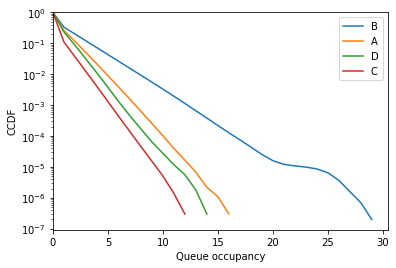

In [26]:
fig = diamond.simulator.show_ccdf(sort=True)

The queues occupancies are given by:

In [27]:
diamond.simulator.compute_average_queues()

array([0.4607483, 0.8326024, 0.1660444, 0.3679351])

They can be displayed (optionally sorted).

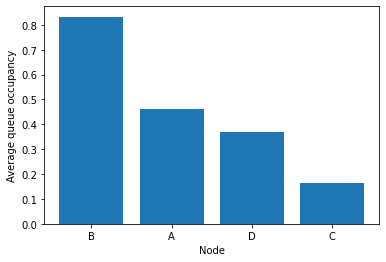

In [28]:
fig = diamond.simulator.show_average_queues(sort=True)

It is possible to use the arrival rates to express the results as waiting times.

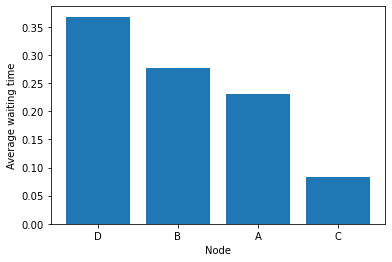

In [29]:
fig = diamond.simulator.show_average_queues(sort=True, as_time=True)

See the [Simulation notebook](simulator.ipynb) for more details.